In [1]:
dir(pattern='*csv')

[1] "alldata.normalised.csv"       "aml.hitcount.merged.csv"     
[3] "aml.hitcount.pivot.csv"       "aml.normalised.pivot.csv"    
[5] "control.normalised.pivot.csv"

In [2]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
library('ggbeeswarm')

In [146]:
library('broom')

In [275]:
aml.data.wide = read_csv('aml.normalised.pivot.zeroes.csv')
cont.data.wide = read_csv('control.normalised.pivot.zeroes.csv')
merge.dada.long = read_csv('alldata.normalised.zeroes.csv')

Parsed with column specification:
cols(
  .default = col_double(),
  acc = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  .default = col_double(),
  acc = col_character()
)
See spec(...) for full column specifications.
Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_integer(),
  count = col_integer(),
  seq = col_character(),
  file = col_character(),
  type = col_character(),
  acc = col_character(),
  read_count = col_integer(),
  normalised_count = col_double()
)


In [59]:
aml.data.wide %>% head
aml.data.wide %>% dim

cont.data.wide %>% head
cont.data.wide %>% dim

merge.dada.long %>% head
merge.dada.long %>% dim

acc,AB052567.1,AB052568.1,AB052569.1,AB052570.1,AB052571.1,AB052572.1,AB052573.1,AB052574.1,AB052575.1,⋯,XM_017007612.2,XM_017007613.2,XM_017007614.2,XM_017007620.2,XM_017012936.1,XM_017017016.1,XM_017027549.1,XM_024453864.1,XM_024453865.1,XM_024453866.1
SRR1036002,0,0.0000000,0.000000,0,0.0000000,0.0000000,0.000000,0,0,⋯,0.0000000,0.0000000,0.0000000,0,0.000000,0.0000000,0,0.0000000,0.0000000,0.0000000
SRR1036003,0,0.0000000,0.000000,0,0.0000000,0.0000000,0.000000,0,0,⋯,0.0000000,0.0000000,0.0000000,0,0.000000,0.0000000,0,0.0000000,0.0000000,0.0000000
SRR1036004,0,0.2233504,0.279188,0,0.1116752,0.1116752,0.279188,0,0,⋯,0.2233504,0.1116752,0.2233504,0,2.121829,0.4467009,0,0.2233504,0.2233504,0.1116752
SRR1036005,0,0.0000000,0.000000,0,0.0000000,0.0000000,0.000000,0,0,⋯,0.0000000,0.0000000,0.0000000,0,0.000000,0.0000000,0,0.0000000,0.0000000,0.0000000
SRR1036006,0,0.0000000,0.000000,0,0.0000000,0.0000000,0.000000,0,0,⋯,0.0000000,0.0000000,0.0000000,0,0.000000,0.0000000,0,0.0000000,0.0000000,0.0000000
SRR1036007,0,0.0000000,0.000000,0,0.0000000,0.0000000,0.000000,0,0,⋯,0.0000000,0.0000000,0.0000000,0,0.000000,0.0000000,0,0.0000000,0.0000000,0.0000000


[1] 1500  276

acc,AB052567.1,AB052568.1,AB052569.1,AB052570.1,AB052571.1,AB052572.1,AB052573.1,AB052574.1,AB052575.1,⋯,XM_017007612.2,XM_017007613.2,XM_017007614.2,XM_017007620.2,XM_017012936.1,XM_017017016.1,XM_017027549.1,XM_024453864.1,XM_024453865.1,XM_024453866.1
ERR011377,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0.00000000,0,0,0,0,0,0
ERR011378,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0.00000000,0,0,0,0,0,0
ERR011379,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0.00000000,0,0,0,0,0,0
ERR011380,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0.00000000,0,0,0,0,0,0
ERR011381,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0.05885167,0,0,0,0,0,0
ERR011382,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0.00000000,0,0,0,0,0,0


[1] 1170  276

X1,count,seq,file,type,acc,read_count,normalised_count
0,0,NM_001329964.1,aml_results/aml.SRR948635.sam.hitcount.txt,aml,SRR948635,17042498,0
1,0,NM_003722.4,aml_results/aml.SRR948635.sam.hitcount.txt,aml,SRR948635,17042498,0
2,0,NM_001329150.1,aml_results/aml.SRR948635.sam.hitcount.txt,aml,SRR948635,17042498,0
3,0,NM_001329149.1,aml_results/aml.SRR948635.sam.hitcount.txt,aml,SRR948635,17042498,0
4,0,NM_001329148.1,aml_results/aml.SRR948635.sam.hitcount.txt,aml,SRR948635,17042498,0
5,0,NM_001329146.1,aml_results/aml.SRR948635.sam.hitcount.txt,aml,SRR948635,17042498,0


[1] 859957      8

In [60]:
all.data.wide = rbind(aml.data.wide, cont.data.wide)

In [62]:
all.data.wide %>% head
all.data.wide %>% dim

acc,AB052567.1,AB052568.1,AB052569.1,AB052570.1,AB052571.1,AB052572.1,AB052573.1,AB052574.1,AB052575.1,⋯,XM_017007612.2,XM_017007613.2,XM_017007614.2,XM_017007620.2,XM_017012936.1,XM_017017016.1,XM_017027549.1,XM_024453864.1,XM_024453865.1,XM_024453866.1
SRR1036002,0,0.0000000,0.000000,0,0.0000000,0.0000000,0.000000,0,0,⋯,0.0000000,0.0000000,0.0000000,0,0.000000,0.0000000,0,0.0000000,0.0000000,0.0000000
SRR1036003,0,0.0000000,0.000000,0,0.0000000,0.0000000,0.000000,0,0,⋯,0.0000000,0.0000000,0.0000000,0,0.000000,0.0000000,0,0.0000000,0.0000000,0.0000000
SRR1036004,0,0.2233504,0.279188,0,0.1116752,0.1116752,0.279188,0,0,⋯,0.2233504,0.1116752,0.2233504,0,2.121829,0.4467009,0,0.2233504,0.2233504,0.1116752
SRR1036005,0,0.0000000,0.000000,0,0.0000000,0.0000000,0.000000,0,0,⋯,0.0000000,0.0000000,0.0000000,0,0.000000,0.0000000,0,0.0000000,0.0000000,0.0000000
SRR1036006,0,0.0000000,0.000000,0,0.0000000,0.0000000,0.000000,0,0,⋯,0.0000000,0.0000000,0.0000000,0,0.000000,0.0000000,0,0.0000000,0.0000000,0.0000000
SRR1036007,0,0.0000000,0.000000,0,0.0000000,0.0000000,0.000000,0,0,⋯,0.0000000,0.0000000,0.0000000,0,0.000000,0.0000000,0,0.0000000,0.0000000,0.0000000


[1] 2670  276

In [73]:
idx <- rowSums(all.data.wide[,2:276]) == 0
all.data.wide2 <- all.data.wide[idx,]

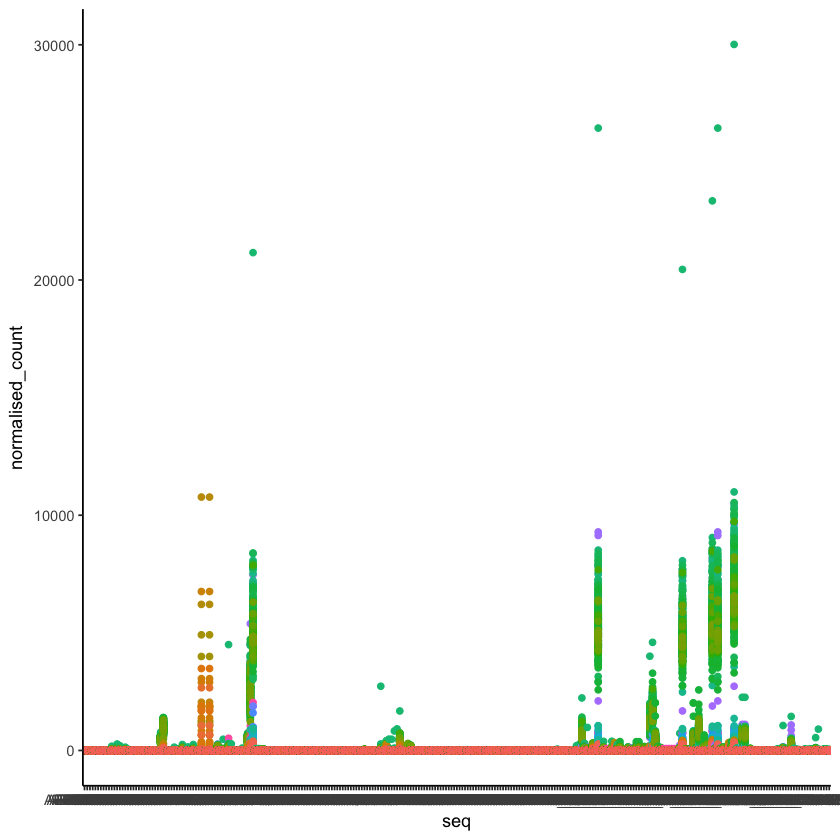

In [114]:
merge.dada.long %>% 
   ggplot(aes(seq, normalised_count)) +
   geom_quasirandom(aes(color=acc)) +
   #geom_line(aes(color=acc)) +
   #scale_y_log10() +
   #xlim(0,205)
   #ylim(-100,100) +
   theme_classic() + 
   theme(legend.position="none")

In [276]:
gg <- ggplot(merge.dada.long,aes(seq, normalised_count, group=acc)) +
   
   geom_quasirandom(aes(color=type)) +
   #geom_line(aes(color=type)) +
   #scale_y_log10() +
   #ylim(100,35000) +
   #ylim(-100,100) +
   theme_classic() + 
   theme()

Warning message:
“Removed 823582 rows containing missing values (position_quasirandom).”

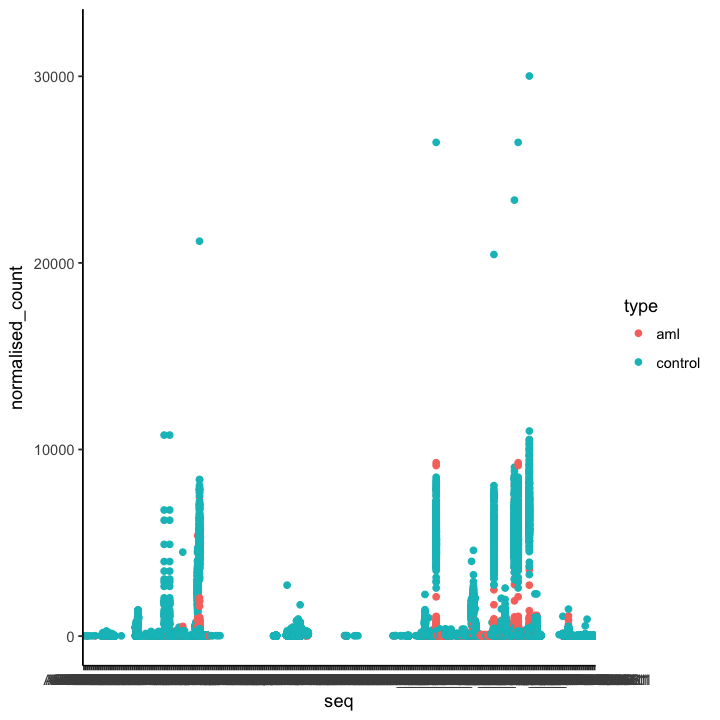

In [278]:
gg + ylim(10,32000) + 
   #scale_y_log10() +
   theme(axis.text.x=element_text(angle = 0))

# Clustering analysis

In [13]:
library('pheatmap')

In [84]:
all.data.log <- log1p(as.matrix(all.data.wide[2:276]))

In [85]:
rownames(all.data.log) <- all.data.wide$acc

all.data.log %>% head

,AB052567.1,AB052568.1,AB052569.1,AB052570.1,AB052571.1,AB052572.1,AB052573.1,AB052574.1,AB052575.1,AB052576.1,⋯,XM_017007612.2,XM_017007613.2,XM_017007614.2,XM_017007620.2,XM_017012936.1,XM_017017016.1,XM_017027549.1,XM_024453864.1,XM_024453865.1,XM_024453866.1
SRR1036002,0,0.0000000,0.0000000,0,0.0000000,0.0000000,0.0000000,0,0,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0,0.000000,0.0000000,0,0.0000000,0.0000000,0.0000000
SRR1036003,0,0.0000000,0.0000000,0,0.0000000,0.0000000,0.0000000,0,0,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0,0.000000,0.0000000,0,0.0000000,0.0000000,0.0000000
SRR1036004,0,0.2015933,0.2462255,0,0.1058681,0.1058681,0.2462255,0,0,0.1058681,⋯,0.2015933,0.1058681,0.2015933,0,1.138419,0.3692857,0,0.2015933,0.2015933,0.1058681
SRR1036005,0,0.0000000,0.0000000,0,0.0000000,0.0000000,0.0000000,0,0,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0,0.000000,0.0000000,0,0.0000000,0.0000000,0.0000000
SRR1036006,0,0.0000000,0.0000000,0,0.0000000,0.0000000,0.0000000,0,0,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0,0.000000,0.0000000,0,0.0000000,0.0000000,0.0000000
SRR1036007,0,0.0000000,0.0000000,0,0.0000000,0.0000000,0.0000000,0,0,0.0000000,⋯,0.0000000,0.0000000,0.0000000,0,0.000000,0.0000000,0,0.0000000,0.0000000,0.0000000


In [97]:
all.data.logT = t(all.data.log)

In [98]:
all.data.logT %>% head
all.data.logT %>% dim

,SRR1036002,SRR1036003,SRR1036004,SRR1036005,SRR1036006,SRR1036007,SRR1036008,SRR1036009,SRR1036010,SRR1036011,⋯,ERR205014,ERR205015,ERR205016,ERR205017,ERR205018,ERR205019,ERR205020,ERR205021,ERR205022,ERR205023
AB052567.1,0,0,0.0000000,0,0,0,0.4226299,0,0,0,⋯,0.7677206,1.1885183,0.8042315,0.7541133,0.6272288,0.72813914,0.9596098,0.6038123,0.8998862,0.7605475
AB052568.1,0,0,0.2015933,0,0,0,0.9469784,0,0,0,⋯,0.9744781,1.4037942,1.0085548,0.9654802,0.7506989,0.83859371,1.0641239,0.7076421,1.0855154,0.8917118
AB052569.1,0,0,0.2462255,0,0,0,1.4245090,0,0,0,⋯,0.9587905,1.6861118,0.9612532,1.1791015,0.9247084,0.60395183,1.2936618,0.9668197,1.2744175,1.1783193
AB052570.1,0,0,0.0000000,0,0,0,0.4226299,0,0,0,⋯,0.0792632,0.1885306,0.1469798,0.2479778,0.1060235,0.03397194,0.1834332,0.2949558,0.3912583,0.2150175
AB052571.1,0,0,0.1058681,0,0,0,0.7187852,0,0,0,⋯,0.6880695,1.0677272,0.6064307,0.8112886,0.6152099,0.44011718,0.7789790,0.3960957,0.8524191,0.7744657
AB052572.1,0,0,0.1058681,0,0,0,0.9469784,0,0,0,⋯,0.3741056,1.0239881,0.5286583,0.7089789,0.5656357,0.39459155,0.6221146,0.3568586,0.7819362,0.6095442


[1]  275 2670

In [99]:
annotation_col = data.frame(type = factor(rep(c("Cont", "AML"), c(1500, 1170))))
rownames(annotation_col) = colnames(all.data.logT)

annotation_col %>% head

,type
SRR1036002,Cont
SRR1036003,Cont
SRR1036004,Cont
SRR1036005,Cont
SRR1036006,Cont
SRR1036007,Cont


In [175]:
ann_colors = list(type = c(Cont="#619CFF", AML = "#F8766D")) #F8766D red3 #619CFF deepskyblue3
ann_colors

$type
     Cont       AML 
"#619CFF" "#F8766D"

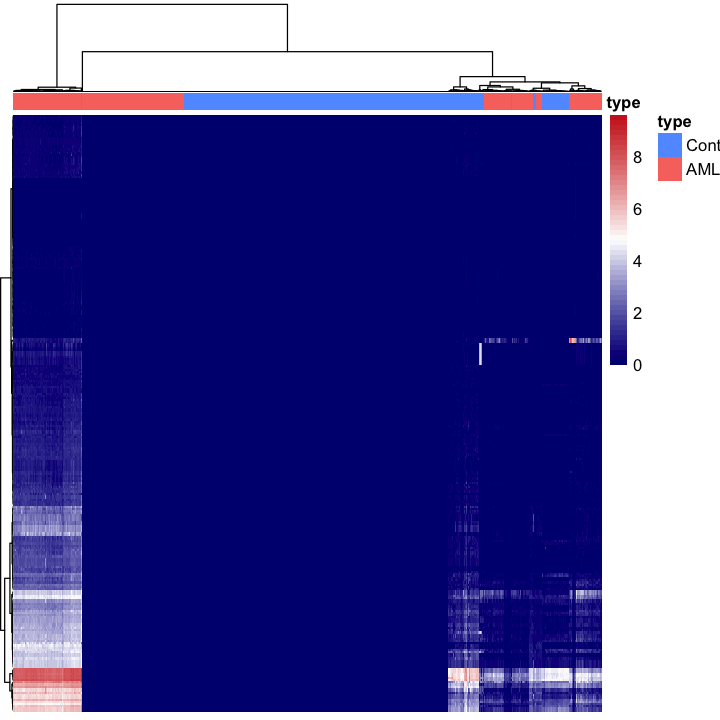

In [234]:
pheatmap(t(all.data.log), 
         color = colorRampPalette(c("navy", "white", "firebrick3"))(50),
         annotation_col = annotation_col, show_rownames=F, show_colnames=F,
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean", 
         clustering_method = "ward.D2",
         annotation_colors = ann_colors,
         treeheight_row=3)

# PCA analysis

In [264]:
pca = prcomp(all.data.log, center = F , scale = F)

In [222]:
options(repr.plot.width=6, repr.plot.height=6)

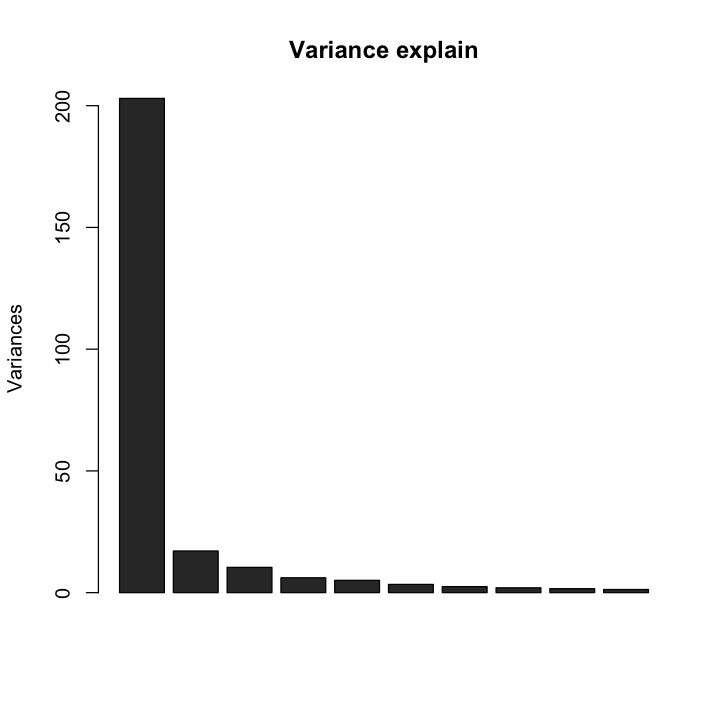

In [235]:
plot(pca, col='gray20', main='Variance explain')

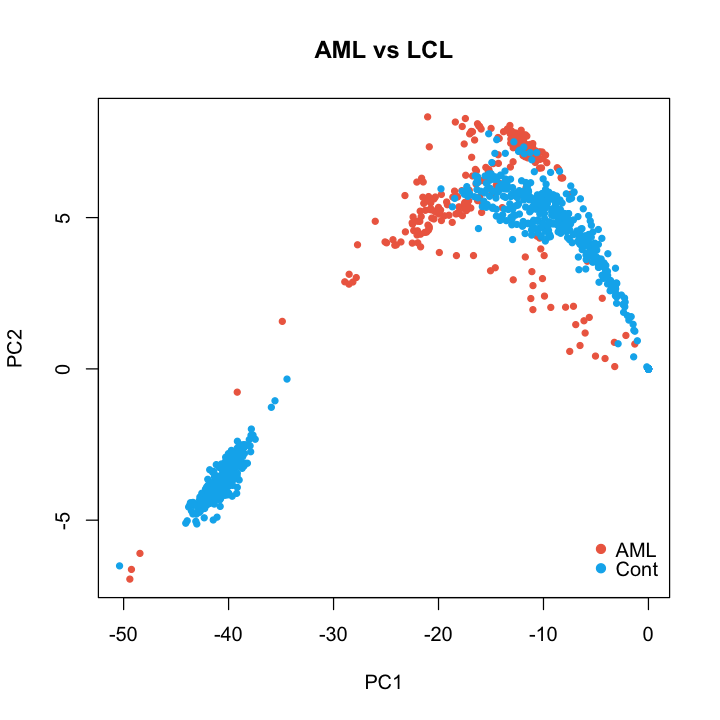

In [242]:
options(repr.plot.width=6, repr.plot.height=6)
plot(pca$x[,1], pca$x[,2], col=c(rep("coral2",1500),rep("deepskyblue2",1170)), pch=20,
     xlab='PC1', ylab='PC2',main='AML vs LCL')

legend('bottomright',legend=c("AML", "Cont"), col=c("coral2", "deepskyblue2"), pch=19, cex=1, inset=.02, box.lty=0)

In [243]:
library("scatterplot3d")

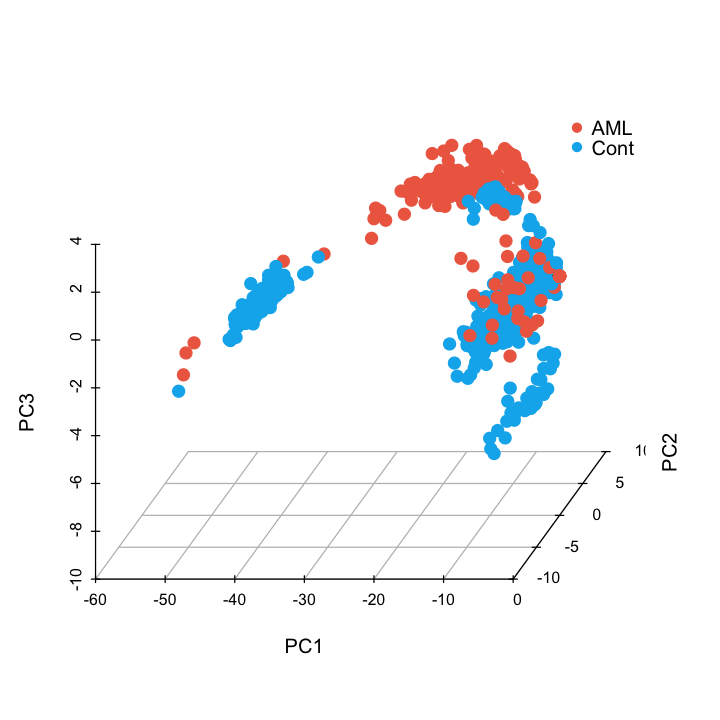

In [266]:
scatterplot3d(pca$x[,1],pca$x[,2], pca$x[,3], pch=20, color=cc, cex.symbols=2, font.axis=F,
             xlab='PC1', ylab='PC2', zlab='PC3', angle=60, grid=T, box=F)
legend('topright',legend=c("AML", "Cont"), col=c("coral2", "deepskyblue2"), pch=19, cex=1, inset=.02, box.lty=0)